# Project: Body Fat Prediction Dataset
Body fat estimates and various body circumference measurements for 252 men.

For more detail, check [Kaggle](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset).

## Index

The project is split into five parts:

**Part 1:** We treated the data removing the outliers and using the filter method to choose only the most important features. We used Linear regression and RF to make predictions with the new data set. Ultimately, we trained an XGB regressor on the complete data set and compared the results.

**Part 2:** We used the auto-Sklern library to do algorithm selection and hyperparameter tuning.

**Part 3:** We trained two different Neural Networks.

**Part 4:** We used Auto-PyTorch to optimize the network architecture and the training hyperparameters.

**Part 5:** We used PyTorch Tabular and trained the following models: Category Embedding, GATE, NODE, and TabNet.



## About Dataset
### Context

Lists estimates of the percentage of body fat determined by underwater
weighing and various body circumference measurements for 252 men.

### Educational use of the dataset

This data set can be used to illustrate multiple regression techniques. Accurate measurement of body fat is inconvenient/costly and it is desirable to have easy methods of estimating body fat that are not inconvenient/costly.



## Analizing Feature importance

We start by analyzing the data and the correlation between the features. The goal is to identify outliers and remove unecessary features.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.metrics import r2_score
sn.set(style='whitegrid')

In [ ]:
bf = pd.read_csv('bodyfat.csv')
bf.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


# Outliers

In [ ]:
for feature in bf.columns:
    data = bf[feature]    
    Q3, Q1 = data.quantile(0.75), data.quantile(0.25)
    IQR = Q3 - Q1
    
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    print(feature)
    print(data[outliers])

Density
215    0.995
Name: Density, dtype: float64
BodyFat
215    47.5
Name: BodyFat, dtype: float64
Age
Series([], Name: Age, dtype: int64)
Weight
38    363.15
40    262.75
Name: Weight, dtype: float64
Height
41    29.5
Name: Height, dtype: float64
Neck
38     51.2
44     31.5
105    31.1
Name: Neck, dtype: float64
Chest
38    136.2
40    128.3
Name: Chest, dtype: float64
Abdomen
38     148.1
40     126.2
215    122.1
Name: Abdomen, dtype: float64
Hip
34    116.1
38    147.7
40    125.6
Name: Hip, dtype: float64
Thigh
38     87.3
40     72.5
151    72.9
168    74.4
Name: Thigh, dtype: float64
Knee
38     49.1
191    45.0
243    46.0
Name: Knee, dtype: float64
Ankle
30    33.9
38    29.6
85    33.7
Name: Ankle, dtype: float64
Biceps
38    45.0
Name: Biceps, dtype: float64
Forearm
44     23.1
158    34.9
174    21.0
205    23.1
225    22.0
Name: Forearm, dtype: float64
Wrist
38     21.4
40     21.4
225    15.8
251    20.9
Name: Wrist, dtype: float64


Notice that we have a considerable number of outliears. Since out data set is small, we cannot afford trimming the outliers. So we will fix the values by capping.


In [ ]:
for feature in bf.columns:
    data = bf[feature]    
    Q3, Q1 = data.quantile(0.75), data.quantile(0.25)
    IQR = Q3 - Q1
    upper_lim = (Q3 + 1.5 * IQR)
    lower_lim = (Q1 - 1.5 * IQR)
    bf[feature] = np.where( bf[feature] > upper_lim, upper_lim, bf[feature])
    bf[feature] = np.where( bf[feature] < lower_lim, lower_lim, bf[feature])

### Visualize the data using scatter plot

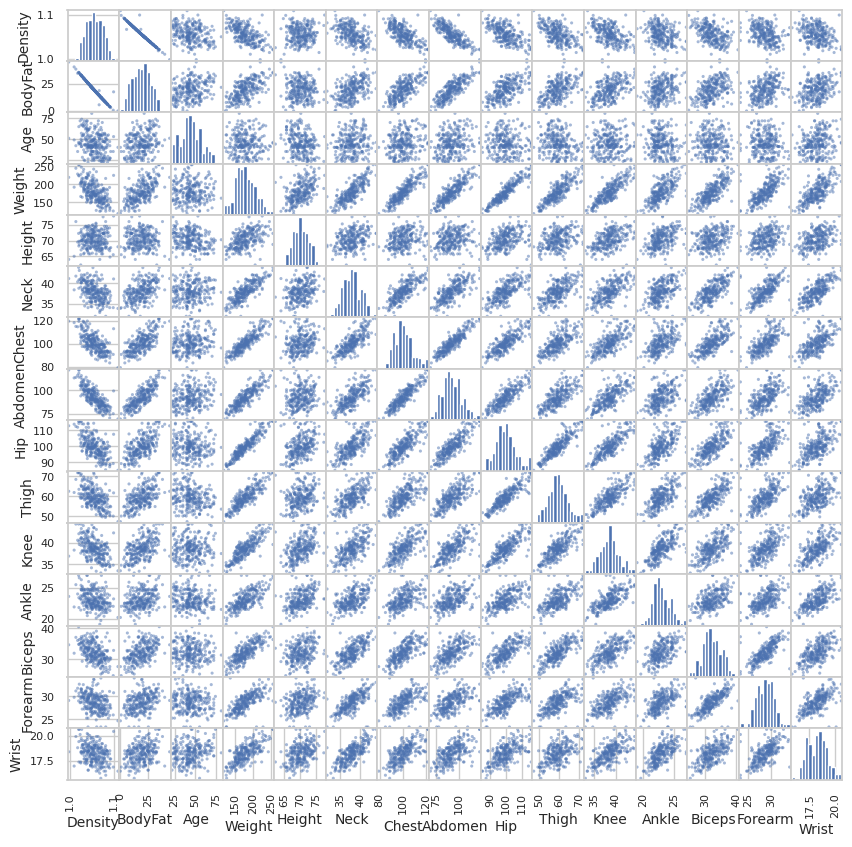

In [ ]:
scatter = pd.plotting.scatter_matrix(bf, marker = '.', s=20, hist_kwds={'bins':15}, figsize=(10,10))
#y labels
temp1=[plt.setp(item.yaxis.get_label(), 'size', 10) for item in scatter.ravel()]
#x labels
temp2=[plt.setp(item.xaxis.get_label(), 'size', 10) for item in scatter.ravel()]

Notice that some features(like Age for instance), have a small correlation with body fat. This means that these features won't contribute to determine out target. 

Now, we will create new features by combining the ones we already have (feature engineering).

### Feature engineering

In [ ]:
bf['BMI'] = bf['Weight']/(bf['Height']*bf['Height'])

bf['BMI/Abdomen'] = bf['BMI']/bf['Abdomen']

bf['Abdomen/Weight'] = bf['Weight']/bf['Abdomen']

bf['Chest/Abdomen'] = bf['Chest']/bf['Abdomen']

bf['Wrist/Forearm'] = bf['Wrist']/bf['Forearm']

bf['Ankle/Knee'] = bf['Ankle']/bf['Knee']

bf['Hip/Ankle'] = bf['Hip']/bf['Ankle']

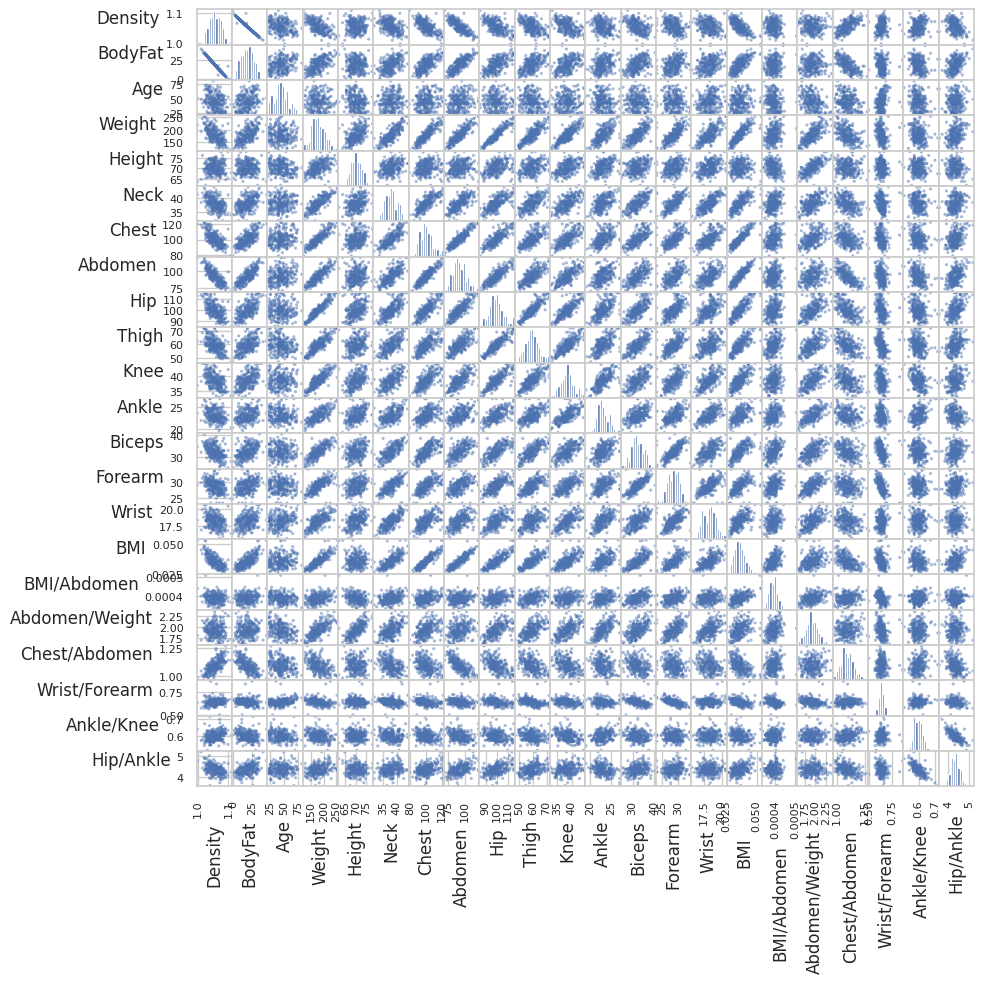

In [ ]:
scatter = pd.plotting.scatter_matrix(bf, marker = '.', s=20, hist_kwds={'bins':15}, figsize=(10,10))
for ax in scatter.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

We will use the Filter method to select the relavant features to our models.

Saving the full data for latter.

In [ ]:
Y0 = bf['BodyFat']
X0 = bf.iloc[:,2:]

In [ ]:
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X0_train)

#normalize the features in the training set
X0_train_s = scaler.transform(X0_train)
#normalize the features in the test set
X0_test_s = scaler.transform(X0_test)
#normalize the features in the validation set
#X_val_s = scaler.transform(X_val)

In [ ]:
X0.to_csv('X.csv', index=False)
Y0.to_csv('Y.csv', index=False)

# Filter

1) Identify input features having high correlation with target variable.

In [ ]:
bf.drop('Density', axis=1, inplace=True)

In [ ]:
importances = bf.drop('BodyFat', axis=1).apply(lambda x: x.corr(bf.BodyFat))
indices = np.argsort(importances)
print(importances[indices])

Chest/Abdomen    -0.687958
Ankle/Knee       -0.257773
Wrist/Forearm    -0.152760
Height           -0.039527
Abdomen/Weight    0.055757
BMI/Abdomen       0.143452
Age               0.292100
Ankle             0.307900
Wrist             0.341262
Forearm           0.375617
Hip/Ankle         0.437836
Biceps            0.493216
Neck              0.493320
Knee              0.509030
Thigh             0.565269
Weight            0.627178
Hip               0.645717
Chest             0.706564
BMI               0.749969
Abdomen           0.827888
dtype: float64


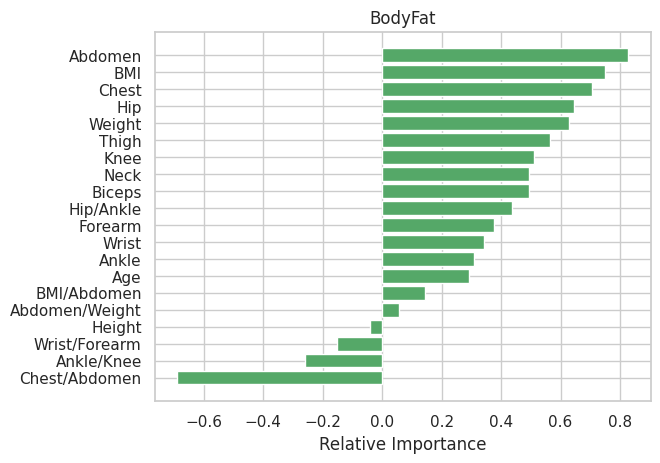

In [ ]:
names=list(bf.drop('BodyFat', axis=1).columns)
plt.title('BodyFat')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We set the threshold to the absolute value of 0.35. We keep input features only if the correlation of the input feature with the target variable is greater than 0.35

In [ ]:
selected_features = []
for i in range(0, len(indices)):
    if np.abs(importances[i])>0.3:
        selected_features.append(names[i])
        print(names[i])

Weight
Neck
Chest
Abdomen
Hip
Thigh
Knee
Ankle
Biceps
Forearm
Wrist
BMI
Chest/Abdomen
Hip/Ankle


In [ ]:
bf = bf[['BodyFat']+selected_features]
bf.head()

,BodyFat,Weight,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI,Chest/Abdomen,Hip/Ankle
0,12.3,154.25,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,0.033605,1.092723,4.315068
1,6.1,173.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,0.033189,1.127711,4.217949
2,25.3,154.00,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,0.035087,1.089875,4.133333
3,10.4,184.75,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,0.035392,1.178241,4.438596
4,28.7,184.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,0.036294,0.973000,4.245833


2) Identify input features that have a low correlation with other independent variables.

In [ ]:
for i in range(0,len(bf.columns)):
    for j in  range(0,len(bf.columns)):
        if i!=j:
            corr_1=np.abs(bf[bf.columns[i]].corr(bf[bf.columns[j]]))
            if corr_1 <0.3:
                print( bf.columns[i] , " is not correlated  with ", bf.columns[j])
            elif corr_1>0.75:
                print( bf.columns[i] , " is highly  correlated  with ", bf.columns[j])

BodyFat  is highly  correlated  with  Abdomen
Weight  is highly  correlated  with  Neck
Weight  is highly  correlated  with  Chest
Weight  is highly  correlated  with  Abdomen
Weight  is highly  correlated  with  Hip
Weight  is highly  correlated  with  Thigh
Weight  is highly  correlated  with  Knee
Weight  is highly  correlated  with  Biceps
Weight  is highly  correlated  with  BMI
Neck  is highly  correlated  with  Weight
Neck  is highly  correlated  with  Chest
Neck  is not correlated  with  Hip/Ankle
Chest  is highly  correlated  with  Weight
Chest  is highly  correlated  with  Neck
Chest  is highly  correlated  with  Abdomen
Chest  is highly  correlated  with  Hip
Chest  is highly  correlated  with  BMI
Abdomen  is highly  correlated  with  BodyFat
Abdomen  is highly  correlated  with  Weight
Abdomen  is highly  correlated  with  Chest
Abdomen  is highly  correlated  with  Hip
Abdomen  is highly  correlated  with  BMI
Hip  is highly  correlated  with  Weight
Hip  is highly  corre

In [ ]:
uncorrelated_features = ['Abdomen', 'Neck', 'Hip/Ankle', 'Knee', 'Ankle', 'Biceps', 'Chest/Abdomen', 'Forearm', 'Wrist']
bf = bf[['BodyFat']+uncorrelated_features]
bf.head()

,BodyFat,Abdomen,Neck,Hip/Ankle,Knee,Ankle,Biceps,Chest/Abdomen,Forearm,Wrist
0,12.3,85.2,36.2,4.315068,37.3,21.9,32.0,1.092723,27.4,17.1
1,6.1,83.0,38.5,4.217949,37.3,23.4,30.5,1.127711,28.9,18.2
2,25.3,87.9,34.0,4.133333,38.9,24.0,28.8,1.089875,25.2,16.6
3,10.4,86.4,37.4,4.438596,37.3,22.8,32.4,1.178241,29.4,18.2
4,28.7,100.0,34.4,4.245833,42.2,24.0,32.2,0.973000,27.7,17.7


### Split the data into a Training Set and a Testing/Test  Set and normalization/standardization

In [ ]:
Y = bf['BodyFat']
X = bf.iloc[:,1:]

array([[<Axes: title={'center': 'Abdomen'}>,
        <Axes: title={'center': 'Neck'}>,
        <Axes: title={'center': 'Hip/Ankle'}>],
       [<Axes: title={'center': 'Knee'}>,
        <Axes: title={'center': 'Ankle'}>,
        <Axes: title={'center': 'Biceps'}>],
       [<Axes: title={'center': 'Chest/Abdomen'}>,
        <Axes: title={'center': 'Forearm'}>,
        <Axes: title={'center': 'Wrist'}>]], dtype=object)

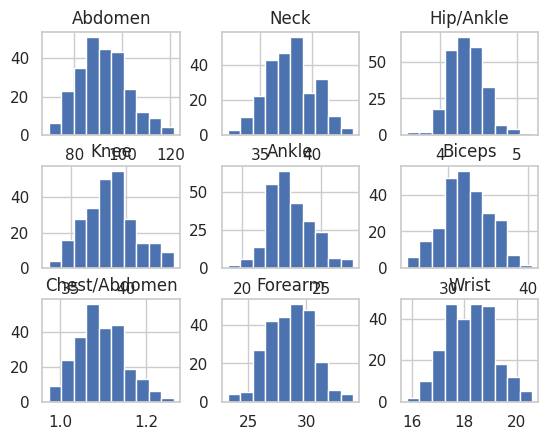

In [ ]:
X.hist()

Notice that the data seems to have a gaussian distribuiton. Hence, we will use StandardScaler

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=0)

In [ ]:
X.to_csv('X.csv', index=False)
Y.to_csv('Y.csv', index=False)

In [ ]:
#convert pandas dataframe to numpy array

X_train=X_train.values

Y_train=Y_train.values

X_test=X_test.values

Y_test=Y_test.values

#X_val=X_val.values

#Y_val=Y_val.values

Feature standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

#normalize the features in the training set
X_train_s = scaler.transform(X_train)
#normalize the features in the test set
X_test_s = scaler.transform(X_test)
#normalize the features in the validation set
#X_val_s = scaler.transform(X_val)

### Using RF Model and analizing feature importance

In [ ]:
def my_scorer(model, X, y):
    y_pred = model.predict(X)
    #MSE = np.mean((y_pred - y)**2)3
    #MAE = np.mean(np.abs(y_pred - y))
    MAPE =  np.mean(np.abs(y_pred - y)/y)
    return -MAPE

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

params = [{'max_depth': np.arange(10, 150, 5),
        'n_estimators': np.arange(64, 125, 10)
          }]


RF = GridSearchCV(RandomForestRegressor(),
                      param_grid=params,
                      scoring=my_scorer,
                      cv=3)
RF.fit(X_train, Y_train)
RF.best_params_

{'max_depth': 75, 'n_estimators': 64}

In [ ]:
model_best=RF.best_estimator_

model_best.fit(X_train, Y_train)
Y_train_pred = model_best.predict(X_train)
Y_test_pred = model_best.predict(X_test)

Trainig results:

Text(0.5, 1.0, 'MSE=3.368460395585246, MAE=1.4923245102611937, R2=0.9506920859012067')

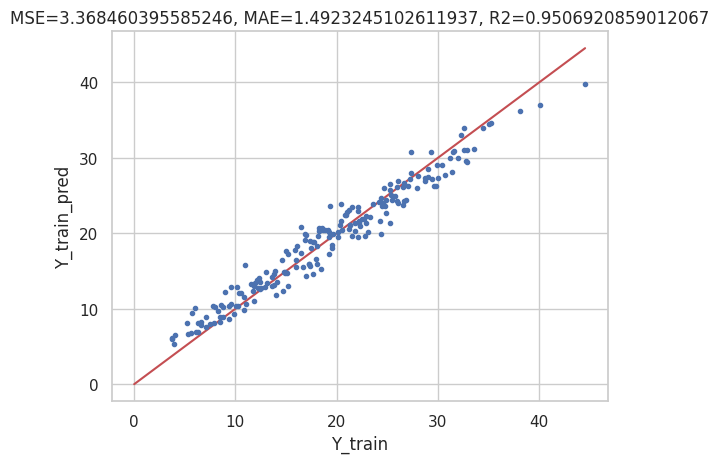

In [ ]:
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
R2 = r2_score(Y_train, Y_train_pred)
#
ymax=np.max([Y_train.max(), Y_train_pred.max()])
plt.plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
plt.plot(Y_train, Y_train_pred, '.')
plt.xlabel('Y_train')
plt.ylabel('Y_train_pred')
plt.title('MSE='+str(MSE)+', MAE='+str(MAE)+', R2='+str(R2))

Testing results:

Text(0.5, 1.0, 'MSE=19.48378534429213, MAE=3.7414866727941183, R2=0.7306003364138172')

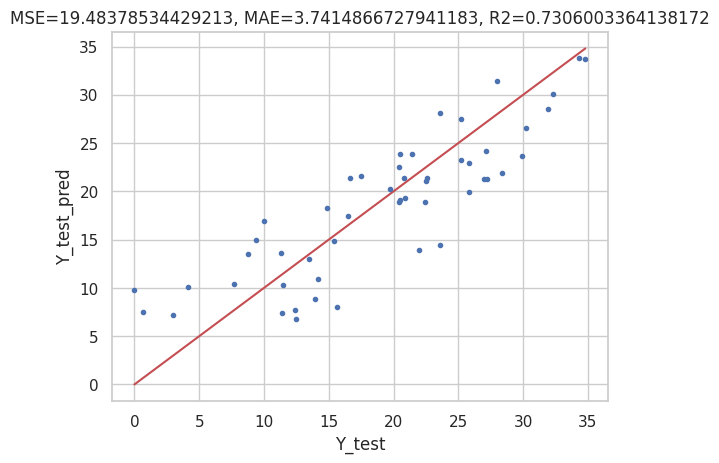

In [ ]:
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
R2 = r2_score(Y_test, Y_test_pred)
#
ymax=np.max([Y_test.max(), Y_test_pred.max()])
plt.plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
plt.plot(Y_test, Y_test_pred, '.')
plt.xlabel('Y_test')
plt.ylabel('Y_test_pred')
plt.title('MSE='+str(MSE)+', MAE='+str(MAE)+', R2='+str(R2))

Text(0.5, 0, 'Feature Importance')

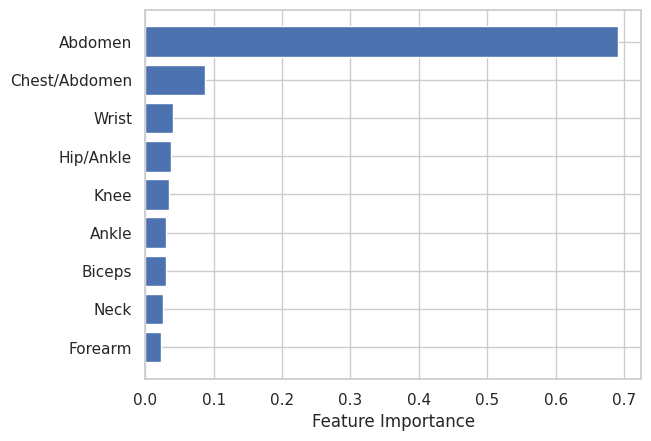

In [ ]:
sort = model_best.feature_importances_.argsort()
plt.barh(X.columns[sort], model_best.feature_importances_[sort])
plt.xlabel("Feature Importance")

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model_LN = LinearRegression()
model_LN.fit(X_train_s, Y_train)

LinearRegression()

In [ ]:
Y_train_pred=model_LN.predict(X_train_s)
Y_test_pred=model_LN.predict(X_test_s)

Trainig results:

Text(0.5, 1.0, 'MSE=18.17795432617631, MAE=3.494500101286697, R2=0.7339089954622545')

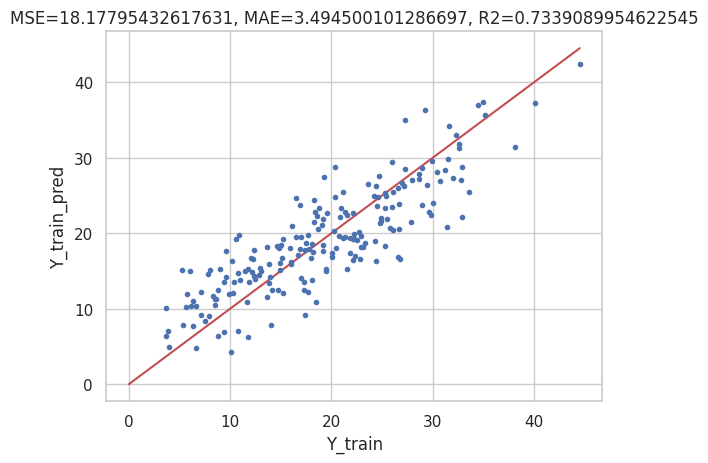

In [ ]:
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
R2 = r2_score(Y_train, Y_train_pred)
#
ymax=np.max([Y_train.max(), Y_train_pred.max()])
plt.plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
plt.plot(Y_train, Y_train_pred, '.')
plt.xlabel('Y_train')
plt.ylabel('Y_train_pred')
plt.title('MSE='+str(MSE)+', MAE='+str(MAE)+', R2='+str(R2))

Testing results:

Text(0.5, 1.0, 'MSE=17.75987648681919, MAE=3.442224174629024, R2=0.7544365909223645')

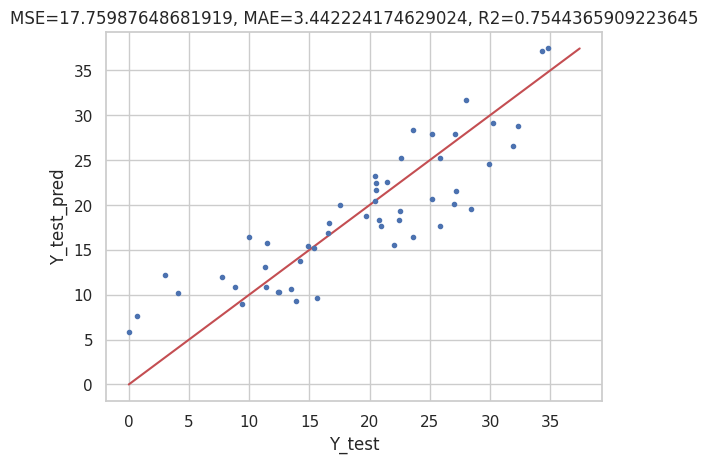

In [ ]:
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
R2 = r2_score(Y_test, Y_test_pred)
#
ymax=np.max([Y_test.max(), Y_test_pred.max()])
plt.plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
plt.plot(Y_test, Y_test_pred, '.')
plt.xlabel('Y_test')
plt.ylabel('Y_test_pred')
plt.title('MSE='+str(MSE)+', MAE='+str(MAE)+', R2='+str(R2))

-------------------

## XGBRegressor

We will star running the XGB Regressor on the filtered data, and then we will run on the full data set to see if it performs differently.

### Filtered Dataset:

In [ ]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
#try to use GridSearchCV to do 10-fold cross-valiation to find the best max_depth
#set random_state=0, objective='reg:squarederror'
#read the comments in the cell of "my_scorer", or you can use the "built-in" scorer in sk-learn

params = [{'max_depth': np.arange(1, 150, 5),
           'n_estimators': np.arange(30, 125, 10)}]

gs_XGB = GridSearchCV(XGBRegressor(),
                      param_grid=params,
                      scoring=my_scorer,
                      cv=3)
gs_XGB.fit(X_train_s, Y_train)
gs_XGB.best_params_

{'max_depth': 1, 'n_estimators': 40}

In [ ]:
model_best=gs_XGB.best_estimator_
model_best

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=40, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
model_best.fit(X_train_s, Y_train)
Y_train_pred = model_best.predict(X_train_s)
Y_test_pred = model_best.predict(X_test_s)

Trainig results:

Text(0.5, 1.0, 'MSE=14.68419899116991, MAE=3.1364054404681005, R2=0.7850509914217367')

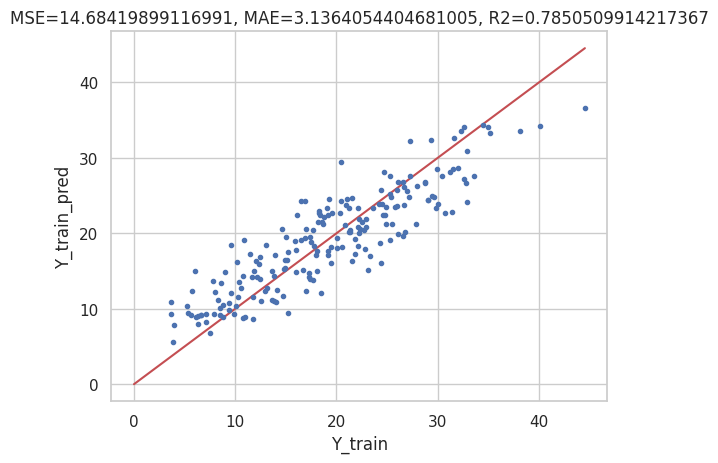

In [ ]:
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
R2 = r2_score(Y_train, Y_train_pred)
#
ymax=np.max([Y_train.max(), Y_train_pred.max()])
plt.plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
plt.plot(Y_train, Y_train_pred, '.')
plt.xlabel('Y_train')
plt.ylabel('Y_train_pred')
plt.title('MSE='+str(MSE)+', MAE='+str(MAE)+', R2='+str(R2))

Testing results:

Text(0.5, 1.0, 'MSE=19.361994209223113, MAE=3.585355840944776, R2=0.7322843259587433')

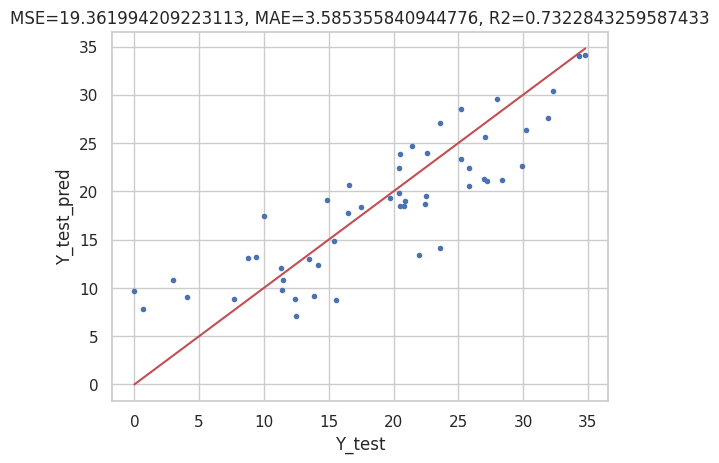

In [ ]:
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
R2 = r2_score(Y_test, Y_test_pred)
#
ymax=np.max([Y_test.max(), Y_test_pred.max()])
plt.plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
plt.plot(Y_test, Y_test_pred, '.')
plt.xlabel('Y_test')
plt.ylabel('Y_test_pred')
plt.title('MSE='+str(MSE)+', MAE='+str(MAE)+', R2='+str(R2))

Text(0.5, 0, 'Feature Importance')

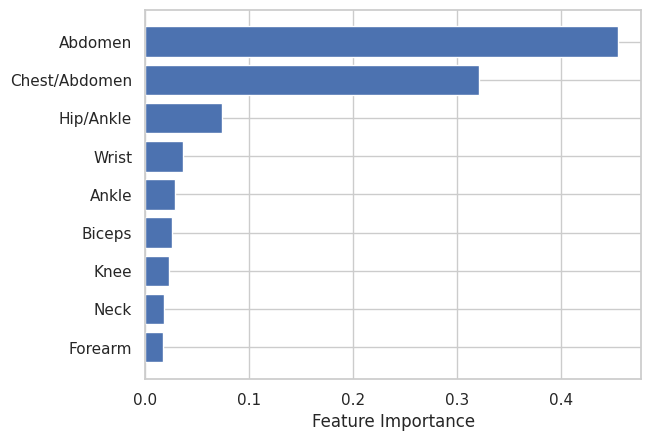

In [ ]:
sort = model_best.feature_importances_.argsort()
plt.barh(X.columns[sort], model_best.feature_importances_[sort])
plt.xlabel("Feature Importance")



---



### Full Dataset:

In [ ]:
gs_XGB.fit(X0_train_s, Y0_train)
gs_XGB.best_params_

{'max_depth': 1, 'n_estimators': 100}

In [ ]:
model_best=gs_XGB.best_estimator_
model_best

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
model_best.fit(X0_train_s, Y0_train)
Y0_train_pred = model_best.predict(X0_train_s)
Y0_test_pred = model_best.predict(X0_test_s)

Trainig results:

Text(0.5, 1.0, 'MSE=8.64546473933319, MAE=2.3524932832860235, R2=0.8734466840489237')

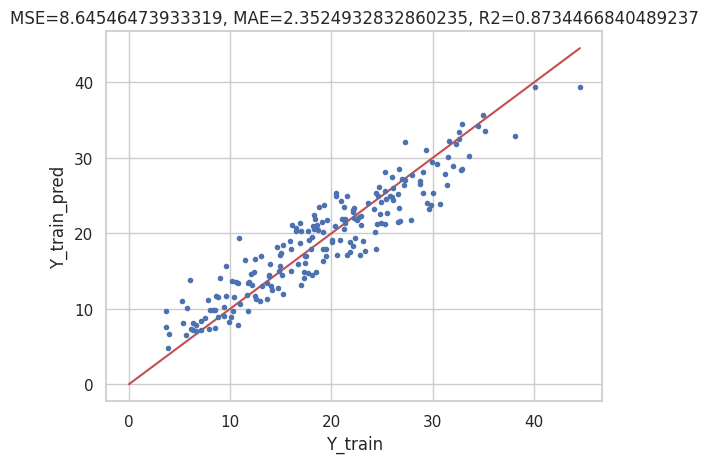

In [ ]:
MSE = np.mean((Y0_train - Y0_train_pred)**2)
MAE = np.mean(np.abs(Y0_train - Y0_train_pred))
R2 = r2_score(Y0_train, Y0_train_pred)
#
ymax=np.max([Y0_train.max(), Y0_train_pred.max()])
plt.plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
plt.plot(Y0_train, Y0_train_pred, '.')
plt.xlabel('Y_train')
plt.ylabel('Y_train_pred')
plt.title('MSE='+str(MSE)+', MAE='+str(MAE)+', R2='+str(R2))

Testing results:

Text(0.5, 1.0, 'MSE=16.860500412653245, MAE=3.4011435415230546, R2=0.7668721422044333')

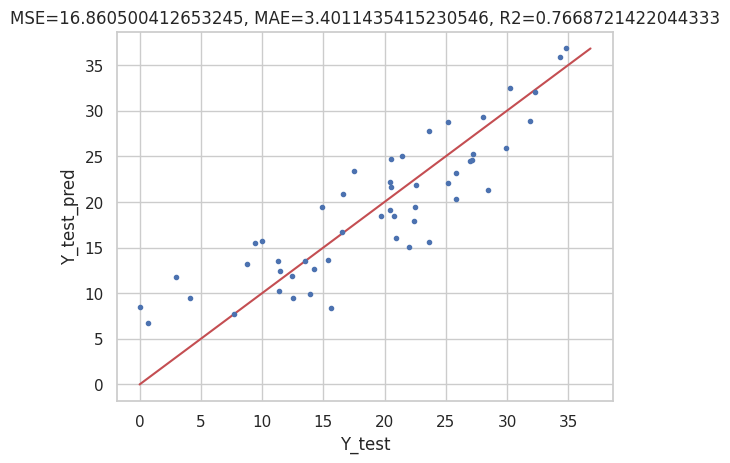

In [ ]:
MSE = np.mean((Y0_test - Y0_test_pred)**2)
MAE = np.mean(np.abs(Y0_test - Y0_test_pred))
R2 = r2_score(Y0_test, Y0_test_pred)
#
ymax=np.max([Y0_test.max(), Y0_test_pred.max()])
plt.plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
plt.plot(Y0_test, Y0_test_pred, '.')
plt.xlabel('Y_test')
plt.ylabel('Y_test_pred')
plt.title('MSE='+str(MSE)+', MAE='+str(MAE)+', R2='+str(R2))

Text(0.5, 0, 'Feature Importance')

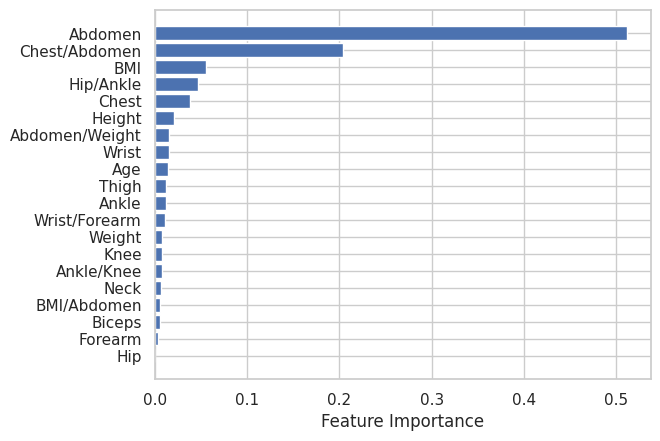

In [ ]:
sort = model_best.feature_importances_.argsort()
plt.barh(X0.columns[sort], model_best.feature_importances_[sort])
plt.xlabel("Feature Importance")

#Part 1 Conclusion

The RF(R2=0.73) and the Linear Regression(R2=0.75) performed better between the three models we fitted by using the filtered data set. While the XGBRegressor had a similar performance than the RF.

However, when using the full data set with the new engineered features, we got the best overall performance(R2=0.76).

It is worth noticing that these results are already at the same level(or better) than the ones reported in the most upvoted project in [Kaggle](https://www.kaggle.com/code/casper6290/bodyfat-prediction). 